In [2]:
%matplotlib inline

In [1]:
import pandas as pd #Manejo de datos tabulados
import numpy as np #Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt #Graficos de datos
import seaborn as sns #Graficos estadisticos
import pandas_profiling as ppr  #
from fitter import fitter #Ajustes de distribuciones de probs
import geopandas as gpd #Pandas para datos geograficos
import datetime #Tipo de dato para fechas y horas

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
##Leemos los datos seleccionados
df_main=pd.read_csv('..\DATA\Churn_Modelling.csv')

### Analisis Exploratorio de Datos
#### EDA, por sus siglas en inglés, es el proceso de limpieza y descubrimiento de insights a través de la revisión detallada de un conjunto de datos.
 ##### Pasos de preparación: 
 ##### 1)Seleccionar las variables a analizar (que sean relevantes para el estudio) 
 ##### 2)Verificar la integridad de las variables (si están limpias o qué debemos hacer para limpiarlas o si no se pueden usar)
 ##### 3)Plantearse preguntas de exploración

#### 1)Seleccionar las variables a analizar (que sean relevantes para el estudio)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Validar integridad del identificador único
len(df_main['CustomerId'].unique()),df_main.shape[0]

(10000, 10000)

### Explorar la variable "Age"

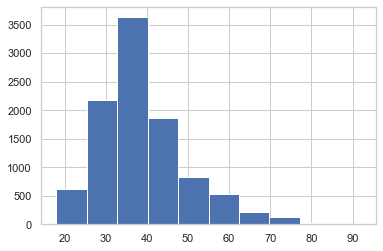

In [8]:
df_main['Age'].hist()
plt.show()

In [9]:
df_main['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [14]:
rangos_edad = [18,24,30,36,42,48,54,60,66,72,78,92]
edad_bins = pd.cut(df_main['Age'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()
edad_bins_count

(30, 36]    2641
(36, 42]    2497
(24, 30]    1511
(42, 48]    1352
(48, 54]     660
(18, 24]     435
(54, 60]     418
(60, 66]     235
(66, 72]     144
(72, 78]      66
(78, 92]      19
Name: Age, dtype: int64

<AxesSubplot:>

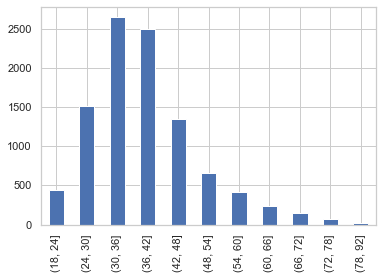

In [15]:
edad_bins_count.sort_index().plot(kind='bar')

In [16]:
df_main['edad_bins']=edad_bins

In [10]:
profile = ppr.ProfileReport(df_main, title='Pandas Profiling Report', minimal=True)
profile.to_file('..\DATA\'Churn_Modelling.csv')

Render HTML: 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]
c:\Users\abiga\Documents\AnalyticsMiproyecto\Pythonanalytics_env\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.46it/s]


In [17]:
# Valores perdidos / missings
df_main['Gender'].isna().sum(), df_main['Gender'].isna().sum() / df_main.shape[0]

(0, 0.0)

### Explorar la variable "Gender"

In [19]:
df_main['Gender'].value_counts(), df_main['Gender'].value_counts(normalize=True)

(Male      5457
 Female    4543
 Name: Gender, dtype: int64,
 Male      0.5457
 Female    0.4543
 Name: Gender, dtype: float64)

In [21]:
conteo_edad_x_sexo = (df_main[['edad_bins', 'Gender']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['edad_bins', 'Gender']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_edad_x_sexo.head()

,edad_bins,Gender,conteo
0,"(18, 24]",Female,199
1,"(18, 24]",Male,236
2,"(24, 30]",Female,677
3,"(24, 30]",Male,834
4,"(30, 36]",Female,1146


### Cruzar las variables "Age" con "Gender"

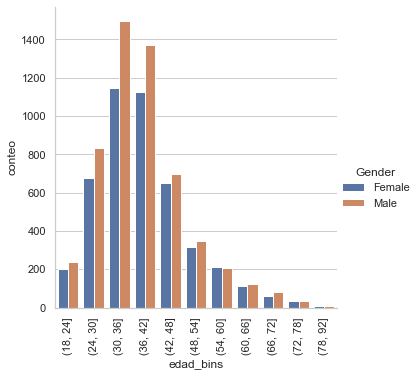

In [22]:
# Gráfica de barras de cantidad de personas por intervalo de edad en cada género
g = sns.catplot(
    data=conteo_edad_x_sexo, kind="bar",
    x="edad_bins", y="conteo", hue="Gender",
)
g.set_xticklabels(rotation=90)
plt.show()

### Explorar con Geopandas la variable "Geography" en un mapa de Europa

In [51]:
shapefile = '../DATA/Europe'
europa_gdf = gpd.read_file(shapefile)
europa_gdf

,NAME,ORGN_NAME,geometry
0,Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."
5,Croatia,Hrvatska,"MULTIPOLYGON (((14.30038 44.50156, 14.28972 44..."
6,Czech Republic,Cesko,"POLYGON ((14.82523 50.87399, 14.83687 50.86996..."
7,Denmark,Danmark,"MULTIPOLYGON (((11.99978 54.94118, 11.98534 54..."
8,Estonia,Eesti,"MULTIPOLYGON (((23.97511 58.09691, 23.96645 58..."
9,Finland,Suomi,"MULTIPOLYGON (((22.07310 60.22830, 22.06502 60..."


<AxesSubplot:>

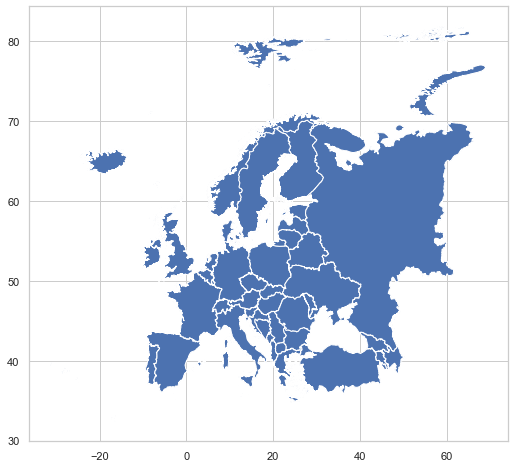

In [54]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1,
                                    figsize=(20, 8))

europa_gdf.plot(ax=ax1)

In [61]:
# Contamos la cantidad de hospitalizados por departamento
conteo_x_pais = df_main['Geography'].value_counts()
conteo_x_pais = conteo_x_pais.reset_index()
conteo_x_pais.head()

,index,Geography
0,France,5014
1,Germany,2509
2,Spain,2477


In [70]:
# Unimos los conteos utilizando los nombres de departamentos
gdf_conteo_x_pais = pd.merge(left=europa_gdf, right=conteo_x_pais, 
                             left_on="NAME", right_on='index')

<AxesSubplot:>

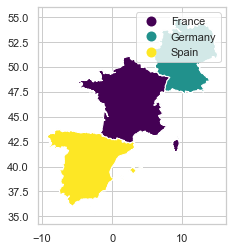

In [76]:
# Mapa de calor de # x pais
gdf_conteo_x_pais.plot("NAME", cmap='viridis',
                       legend=True)             

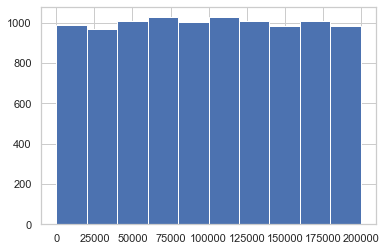

In [78]:
df_main['EstimatedSalary'].hist()
plt.show()

In [79]:
df_main['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [84]:
rangos_SalarioEstimado = [11,1000,10000,25000,50000,100000,150000,200000]
Estimado_bins = pd.cut(df_main['EstimatedSalary'], bins=rangos_SalarioEstimado)

Estimado_bins_count = Estimado_bins.value_counts()
Estimado_bins_count

(100000, 150000]    2555
(50000, 100000]     2537
(150000, 200000]    2455
(25000, 50000]      1236
(10000, 25000]       709
(1000, 10000]        449
(11, 1000]            59
Name: EstimatedSalary, dtype: int64

<AxesSubplot:>

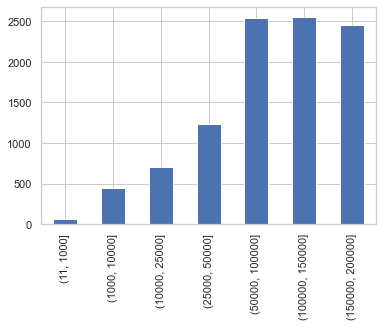

In [86]:
Estimado_bins_count.sort_index().plot(kind='bar')

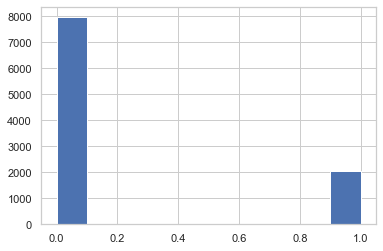

In [87]:
df_main['Exited'].hist()
plt.show()

In [88]:
df_main['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

### Hipotesis2:La fuga puede ser una relación directa con la edad de los clientes bancarios

In [92]:
conteo_edad_x_exited = (df_main[['edad_bins', 'Exited']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['edad_bins', 'Exited']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_edad_x_exited.head()

,edad_bins,Exited,conteo
0,"(18, 24]",0,397
1,"(18, 24]",1,38
2,"(24, 30]",0,1403
3,"(24, 30]",1,108
4,"(30, 36]",0,2389


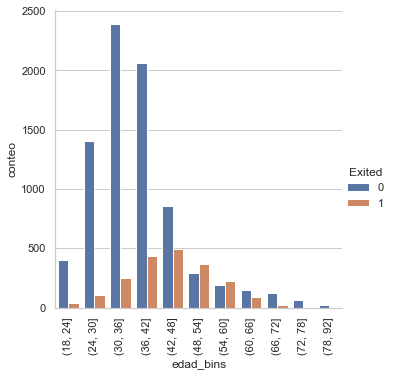

In [93]:
# Gráfica de barras de cantidad de personas por intervalo de edad por fuga
g = sns.catplot(
    data=conteo_edad_x_exited, kind="bar",
    x="edad_bins", y="conteo", hue="Exited",
)
g.set_xticklabels(rotation=90)
plt.show()

In [ ]:
Preguntas de exploración
1.¿Cual es la edad promedio de los clientes que se fugaron del banco?
2)¿Cual es el sueldo estimado de los clientes que se fugaron del banco?
3) sexo Generator
4) 

### Hipotesis2:La fuga puede ser una relación directa con la edad de los clientes bancarios
